In [20]:
import pandas as pd
from iminuit import Minuit 
from iminuit.cost import LeastSquares
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from matplotlib.lines import Line2D

import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')



In [21]:
def retta (x,a,b):
    return (a*x + b)

def sqrt(x, a, b):
    return np.sqrt(a*x + b)

In [22]:
def read():
    Z1 = pd.read_csv('Analisi\Parte 1\Analisi Freq_Vb\F_Vb.CSV')
    Y = []
    S = []
    for i in range(len(Z1.columns.values)):
        if i != 0:
            z = Z1.iloc[:, i]
            y = float(np.mean(z))
            Y.append(y)
            s = float(np.std(z))
            S.append(s)
    return (Y, S)

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\267058926.py:2: SyntaxWarning: invalid escape sequence '\P'
  Z1 = pd.read_csv('Analisi\Parte 1\Analisi Freq_Vb\F_Vb.CSV')


In [23]:
def ax_x (S, Y, E):
    X = [52.5, 53, 53.5, 53.8, 54, 54.3, 54.5, 54.8, 55, 55.3, 55.5, 55.8, 56]
    E1 = []
    X1 = []
    Y1 = []
    for i in range(len(X)):
        if Y[i] > S:
            X1.append(X[i])
            Y1.append(Y[i])
            E1.append(E[i])
    return X1, Y1, E1

In [24]:
def graph(X, Y, S, a, b):
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    plt.plot(np.linspace(51, 56, 100000), sqrt(np.linspace(51, 56, 100000), a, b), label = 'Funzione di interpolazione')
    ax.set_xlabel("Threshold[mV]")
    ax.set_ylabel("Frequency[kHz]")
    ax.scatter(X, Y, color = 'black', label = 'Dati sperimentali')
    ax.errorbar(X, Y, S)
    ax.legend()
    plt.show()


In [25]:
def analisi_sqrt(X, Y, S):

    L_S = LeastSquares(X, Y, S, sqrt)
    my_minuit = Minuit (L_S, a = 40, b = 1000)  
    my_minuit.migrad () 
    my_minuit.hesse ()   

#validità
    V = my_minuit.valid
    print('Validità: ', V)
    Q_squared = my_minuit.fval
    print ('Q-squared: ', Q_squared)
    N_dof = my_minuit.ndof
    print ('DOF: ', N_dof)
    p_v = 1 - chi2.cdf(Q_squared, N_dof)
    print('P value: ', p_v )

#valori dell'interpolazione
    a_f = my_minuit.values[0]
    b_f = my_minuit.values[1]

#visualizzazione 
    display(my_minuit)
    return (a_f, b_f)

def analisi_retta(X,Y,S):
    L_S = LeastSquares(X, Y, S, retta)
    my_minuit = Minuit (L_S, a = 40, b = 500)  
    my_minuit.migrad () 
    my_minuit.hesse ()   

#validità
    V = my_minuit.valid
    print('Validità: ', V)
    Q_squared = my_minuit.fval
    print ('Q-squared: ', Q_squared)
    N_dof = my_minuit.ndof
    print ('DOF: ', N_dof)
    p_v = 1 - chi2.cdf(Q_squared, N_dof)
    print('P value: ', p_v )

#valori dell'interpolazione
    a_f = my_minuit.values[0]
    b_f = my_minuit.values[1]

#visualizzazione 
    display(my_minuit)
    return (a_f, b_f, Q_squared/N_dof)

In [26]:
Y = read()
X = ax_x(0.3, Y[0], Y[1])
Z = analisi_sqrt(X[0], X[1], X[2])
print('a = ', Z[0])
print('b = ', Z[1])

C:\Users\matte\AppData\Local\Temp\ipykernel_13168\666845519.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(a*x + b)


Validità:  False
Q-squared:  8478.391020622017
DOF:  9.0
P value:  0.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8478 (χ²/ndof = 942.0)     │             Nfcn = 2038              │
│ EDM = 5.41e+04 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 5.24956e3 │ 0.00008e3 │            │            │         │         │       │
│ 1 │ b    │-280.840e3 │  0.004e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00582  -0.306 │
│ b │  -0.306    16.6 │
└───┴─────────────────┘

a =  5249.55737439157
b =  -280840.46823225723


5249.55737439157 -280840.46823225723


C:\Users\matte\AppData\Local\Temp\ipykernel_13168\666845519.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(a*x + b)


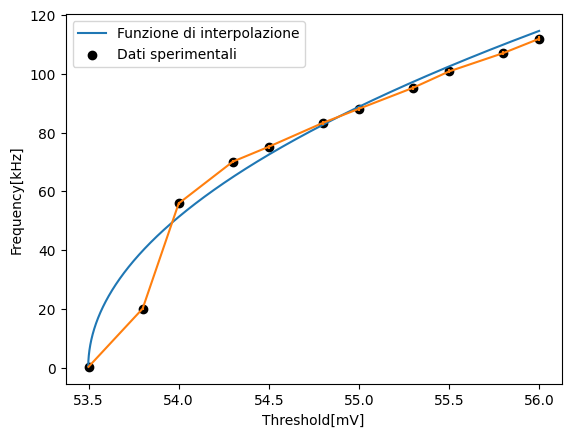

In [27]:
print(Z[0], Z[1])
graph(X[0], X[1], X[2], Z[0], Z[1])

In [28]:
X2 = ax_x(30, Y[0], Y[1])
Z2 = analisi_retta(X2[0], X2[1], X2[2])
print('a = ', Z2[0])
print('b = ', Z2[1])

Validità:  True
Q-squared:  99.22044732424821
DOF:  7.0
P value:  0.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 99.22 (χ²/ndof = 14.2)     │              Nfcn = 59               │
│ EDM = 4.7e-14 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   27.05   │   0.34    │            │            │         │         │       │
│ 1 │ b    │ -1.401e3  │  0.018e3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │ 0.112 -6.16 │
│ b │ -6.16   338 │
└───┴─────────────┘

a =  27.050474277548673
b =  -1400.7914553556966


In [29]:
x = -Z2[1]/Z2[0]
print('X = ', x)

X =  51.78435841763869


In [30]:
def intercetta():
    G = [[], []]
    X = np.linspace(51, 52, 100000000)
    for i in range(len(X)):
        y = float(retta(X[i], Z2[0], Z2[1]))  # Use Z directly as a scalar
        if y <= 0.0000001:
             if  y >= -0.0000001:
                G[0].append(X[i]) 
                G[1].append(y)
    return G
#F = intercetta()
#print('Intercetta: ', F[0])  # Z is already a scalar

In [31]:
X3 = analisi_retta(X2[0], np.sqrt(X2[1]), X2[2])

print('a = ', X3[0])
print('b = ', X3[1])

Validità:  True
Q-squared:  0.6185489642746534
DOF:  7.0
P value:  0.9988863308755216


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.6185 (χ²/ndof = 0.1)     │              Nfcn = 61               │
│ EDM = 9.42e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.49    │   0.34    │            │            │         │         │       │
│ 1 │ b    │    -73    │    18     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │ 0.112 -6.15 │
│ b │ -6.15   338 │
└───┴─────────────┘

a =  1.4892128845430932
b =  -72.62684546603714


In [32]:
x2 = -X3[1]/X3[0]
print('X2 = ', x2)

X2 =  48.76861207678837


# Analisi V_br a seconda della soglia


In [33]:
def read_mean(file_path):
    data = pd.read_excel(file_path)
    mean_values = np.mean(data.iloc[:, 1])
    std_values = np.std(data.iloc[:, 1])
    return mean_values, std_values

X = [52.75, 53, 53.25, 53.5, 53.75, 54, 54.25]

In [34]:
Y1 = read_mean('Dati\Parte 1\Frequency_Vbias\TH3_VB52_75.xls')
Y2 = read_mean('Dati\Parte 1\Frequency_Vbias\TH3_VB53.xls')
Y3 = read_mean('Dati\Parte 1\Frequency_Vbias\TH3_VB53_25.xls')  
Y4 = read_mean('Dati\Parte 1\Frequency_Vbias\TH3VB35_5.xls')
Y5 = pd.read_csv('Dati\Parte 1\Frequency_Vbias\TH3_VB53_75.txt', sep = '\t')
Y5 = (Y5.iloc[:, 1].mean(), Y5.iloc[:, 1].std())
Y6 = read_mean('Dati\Parte 1\Frequency_Vbias\TH3_VB54.xls')
Y7 = read_mean('Dati\Parte 1\Frequency_Vbias\TH3_VB54_25.xls')

V1 = [Y1[0], Y2[0], Y3[0], Y4[0], Y5[0], Y6[0], Y7[0]]
S1 = [Y1[1], Y2[1], Y3[1], Y4[1], Y5[1], Y6[1], Y7[1]]

A1 = analisi_retta(X, V1, S1)
a1_err = 0.016
b1_err = 0.9
Zero1 = -A1[1]/A1[0]
print('Zero = ', Zero1, ' +/- ', Zero1 * np.sqrt((a1_err/A1[0])**2 + (b1_err/A1[1])**2))
print('a = ', A1[0], ' +/- ', a1_err)
print('b = ', A1[1], ' +/- ', b1_err)
print('Q_squared/N_dof = ', A1[2])


Validità:  True
Q-squared:  153.03540617555805
DOF:  5.0
P value:  0.0


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\1404341128.py:1: SyntaxWarning: invalid escape sequence '\P'
  Y1 = read_mean('Dati\Parte 1\Frequency_Vbias\TH3_VB52_75.xls')
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\1404341128.py:2: SyntaxWarning: invalid escape sequence '\P'
  Y2 = read_m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 153 (χ²/ndof = 30.6)       │              Nfcn = 59               │
│ EDM = 1.94e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.400   │   0.016   │            │            │         │         │       │
│ 1 │ b    │   -73.8   │    0.9    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  0.000261 -13.88e-3 │
│ b │ -13.88e-3     0.738 │
└───┴─────────────────────┘

Zero =  52.68511500828722  +/-  0.880909217813159
a =  1.3998262992275858  +/-  0.016
b =  -73.75000956643044  +/-  0.9
Q_squared/N_dof =  30.60708123511161


In [35]:
K1 = read_mean('Dati\Parte 1\Frequency_Vbias\TH4_VB52_75.xls')
K2 = pd.read_csv('Dati\Parte 1\Frequency_Vbias\TH4_VB53.txt', sep = '\t')
K2 = (K2.iloc[:, 1].mean(), K2.iloc[:, 1].std())
K3 = read_mean('Dati\Parte 1\Frequency_Vbias\TH4_VB53_25.xls')
K4 = read_mean('Dati\Parte 1\Frequency_Vbias\TH4_VB53_5.xls')  
K5 = read_mean('Dati\Parte 1\Frequency_Vbias\TH4_VB53_75.xls')
K6 = read_mean('Dati\Parte 1\Frequency_Vbias\TH4_VB54.xls')
K7 = read_mean('Dati\Parte 1\Frequency_Vbias\TH4_VB54_25.xls')

V2_full = [K1[0], K2[0], K3[0], K4[0], K5[0], K6[0], K7[0]]
S2_full = [K1[1], K2[1], K3[1], K4[1], K5[1], K6[1], K7[1]]

X2 = [53, 53.25, 53.5, 53.75, 54, 54.25]
V2 = [ K2[0], K3[0], K4[0], K5[0], K6[0], K7[0]]
S2 = [ K2[1], K3[1], K4[1], K5[1], K6[1], K7[1]]

A2 = analisi_retta(X2, V2, S2)
a2_err = 0.012
b2_err = 0.6
Zero2 = -A2[1]/A2[0]
print('Zero = ', Zero2, ' +/- ', Zero2 * np.sqrt((a2_err/A2[0])**2 + (b2_err/A2[1])**2))
print('a = ', A2[0], ' +/- ', a2_err)
print('b = ', A2[1], ' +/- ', b2_err)
print('Q_squared/N_dof = ', A2[2])

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\3606063806.py:1: SyntaxWarning: invalid escape sequence '\P'
  K1 = read_mean('Dati\Parte 1\Frequency_Vbias\TH4_VB52_75.xls')
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\3606063806.py:2: SyntaxWarning: invalid escape sequence '\P'
  K2 = pd.rea

Validità:  True
Q-squared:  102.51861028922676
DOF:  4.0
P value:  0.0


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 102.5 (χ²/ndof = 25.6)     │              Nfcn = 63               │
│ EDM = 9.56e-13 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.204   │   0.027   │            │            │         │         │       │
│ 1 │ b    │   -63.4   │    1.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000714 -38.2e-3 │
│ b │ -38.2e-3     2.05 │
└───┴───────────────────┘

Zero =  52.66772306219114  +/-  0.7240325757517047
a =  1.2036178898597196  +/-  0.012
b =  -63.39181369583059  +/-  0.6
Q_squared/N_dof =  25.62965257230669


In [36]:
Z1 = read_mean('Dati\Parte 1\Frequency_Vbias\TH5_VB52_75.xls')
Z2 = read_mean('Dati\Parte 1\Frequency_Vbias\TH5_VB53.xls')
Z3 = read_mean('Dati\Parte 1\Frequency_Vbias\TH5_VB53_25.xls')  
Z4 = read_mean('Dati\Parte 1\Frequency_Vbias\TH5_VB53_5.xls')
Z5 = read_mean('Dati\Parte 1\Frequency_Vbias\TH5_VB53_75.xls')
Z6 = read_mean('Dati\Parte 1\Frequency_Vbias\TH5_VB54.xls')
Z7 = read_mean('Dati\Parte 1\Frequency_Vbias\TH5_VB54_25.xls')


V3 = [Z1[0], Z2[0], Z3[0], Z4[0], Z5[0], Z6[0], Z7[0]]
S3 = [Z1[1], Z2[1], Z3[1], Z4[1], Z5[1], Z6[1], Z7[1]]

X_redox = [53, 53.25, 53.5, 53.75, 54, 54.25]
V3_redox = [Z2[0], Z3[0], Z4[0], Z5[0], Z6[0], Z7[0]]
S3_redox = [Z2[1], Z3[1], Z4[1], Z5[1], Z6[1], Z7[1]]   

A3 = analisi_retta(X_redox, V3_redox, S3_redox)
a3_err = 0.021
b3_err = 1.1
Zero3 = -A3[1]/A3[0]
print('Zero = ', Zero3, ' +/- ', Zero3 * np.sqrt((a3_err/A3[0])**2 + (b3_err/A3[1])**2))
print('a = ', A3[0], ' +/- ', a3_err)
print('b = ', A3[1], ' +/- ', b3_err)
print('Q_squared/N_dof = ', A3[2])

Validità:  True
Q-squared:  263.380533851935
DOF:  4.0
P value:  0.0


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\465891440.py:1: SyntaxWarning: invalid escape sequence '\P'
  Z1 = read_mean('Dati\Parte 1\Frequency_Vbias\TH5_VB52_75.xls')
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\465891440.py:2: SyntaxWarning: invalid escape sequence '\P'
  Z2 = read_mea

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 263.4 (χ²/ndof = 65.8)     │              Nfcn = 59               │
│ EDM = 2.02e-11 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.064   │   0.021   │            │            │         │         │       │
│ 1 │ b    │   -56.1   │    1.1    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 0.000435 -23.3e-3 │
│ b │ -23.3e-3     1.25 │
└───┴───────────────────┘

Zero =  52.68204142513314  +/-  1.4658596010328966
a =  1.0642985645460907  +/-  0.021
b =  -56.06942106612689  +/-  1.1
Q_squared/N_dof =  65.84513346298375


<>:15: SyntaxWarning: invalid escape sequence '\P'
<>:15: SyntaxWarning: invalid escape sequence '\P'
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\1712495728.py:15: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig('Analisi\Parte 1\Analisi Freq_Vb\TH3.png', dpi = 300)


<Figure size 1500x600 with 0 Axes>

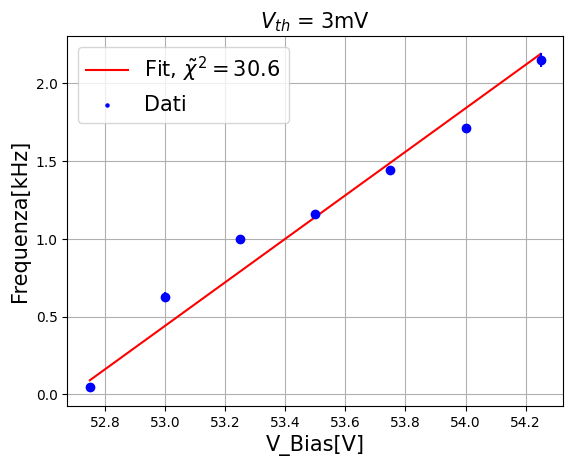

In [51]:
assex = np.linspace(52.75, 54.25, 100000)
assey1 = retta(assex, A1[0], A1[1]) 
assey2 = retta(assex, A2[0], A2[1])
assey3 = retta(assex, A3[0], A3[1])
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots(nrows = 1, ncols = 1)
plt.plot(assex, assey1, color = 'red', label = rf'Fit, $\tilde\chi^2 = {A1[2]:.3g}$')
ax.scatter(X, V1, color = 'blue', label = 'Dati', s = 5)
ax.errorbar(X, V1, S1, fmt = 'o', color = 'blue')
ax.grid()
plt.title('$V_{th}$ = 3mV', fontsize=15)
ax.set_xlabel("V_Bias[V]", fontsize=15)
ax.set_ylabel("Frequenza[kHz]", fontsize=15)
ax.legend(fontsize=15)
plt.savefig('Analisi\Parte 1\Analisi Freq_Vb\TH3.png', dpi = 300)
plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\P'
<>:11: SyntaxWarning: invalid escape sequence '\P'
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\78345755.py:11: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig('Analisi\Parte 1\Analisi Freq_Vb\TH4.png', dpi = 300)


<Figure size 1500x600 with 0 Axes>

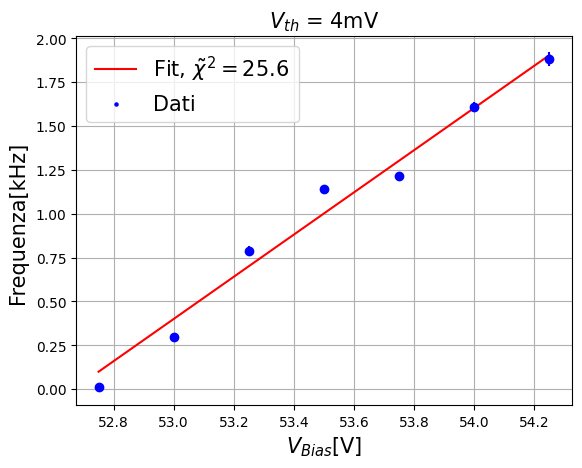

In [48]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots(nrows = 1, ncols = 1)
plt.plot(assex, assey2, color  = 'red', label = rf'Fit, $\tilde\chi^2 = {A2[2]:.3g}$ ')
ax.scatter(X, V2_full, color = 'blue', label = 'Dati', s = 5)
ax.errorbar(X, V2_full, S2_full, fmt = 'o', color = 'blue')
ax.grid()
plt.title ('$V_{th}$ = 4mV', fontsize = 15)
ax.set_xlabel("$V_{Bias}$[V]", fontsize = 15)
ax.set_ylabel("Frequenza[kHz] ", fontsize = 15)
ax.legend(fontsize = 15)
plt.savefig('Analisi\Parte 1\Analisi Freq_Vb\TH4.png', dpi = 300)
plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\P'
<>:11: SyntaxWarning: invalid escape sequence '\P'
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\2309832193.py:11: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig('Analisi\Parte 1\Analisi Freq_Vb\TH5.png', dpi = 300)


<Figure size 1500x600 with 0 Axes>

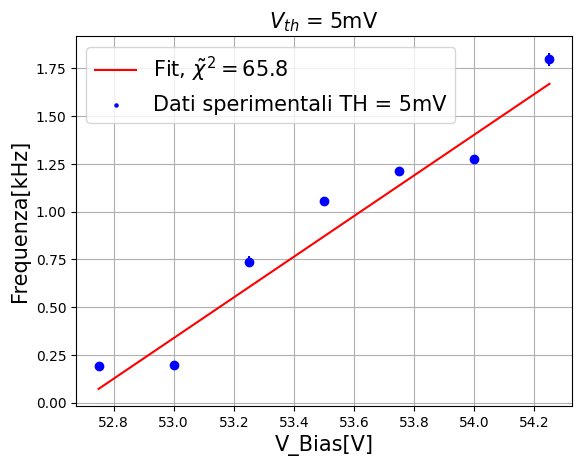

In [ ]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots(nrows = 1, ncols = 1)
plt.plot(assex, assey3, color = 'red', label = rf'Fit, $\tilde\chi^2 = {A3[2]:.3g}$')
ax.scatter(X, V3, color = 'blue', label = 'Dati ', s = 5)
ax.errorbar(X, V3, S3, fmt = 'o', color = 'blue')
ax.grid()
plt.title('$V_{th}$ = 5mV', fontsize=15)
ax.set_xlabel("V_Bias[V]", fontsize=15)
ax.set_ylabel("Frequenza[kHz]", fontsize=15)
ax.legend(fontsize=15)
plt.savefig('Analisi\Parte 1\Analisi Freq_Vb\TH5.png', dpi = 300)
plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\P'
C:\Users\matte\AppData\Local\Temp\ipykernel_13168\1125038723.py:16: SyntaxWarning: invalid escape sequence '\P'
  plt.savefig('Analisi\Parte 1\Analisi Freq_Vb\TH3.png', dpi = 300)


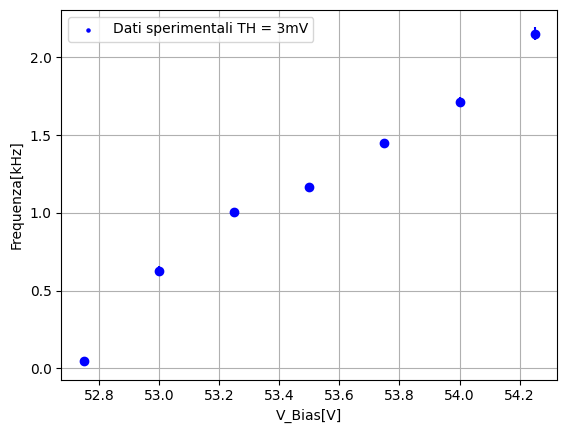

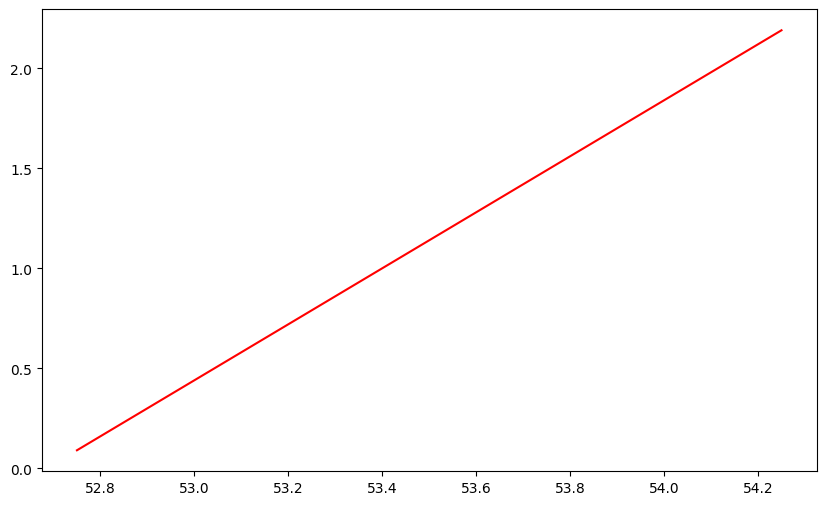

In [41]:
assex = np.linspace(52.75, 54.25, 100000)
assey1 = retta(assex, A1[0], A1[1]) 
assey2 = retta(assex, A2[0], A2[1])
assey3 = retta(assex, A3[0], A3[1])
fig, ax = plt.subplots(nrows = 1, ncols = 1)
plt.figure(figsize=(10, 6))


plt.plot(assex, assey1, color = 'red', label = 'Retta interpolata per TH = 3mV')
ax.scatter(X, V1, color = 'blue', label = 'Dati sperimentali TH = 3mV', s = 5)
ax.errorbar(X, V1, S1, fmt = 'o', color = 'blue')
ax.grid()
ax.set_xlabel("V_Bias[V]")
ax.set_ylabel("Frequenza[kHz]")
ax.legend()
plt.savefig('Analisi\Parte 1\Analisi Freq_Vb\TH3.png', dpi = 300)
plt.show()